In [110]:
import pandas as pd

In [111]:
df_tags=pd.read_csv('tags.csv')
df_ratings=pd.read_csv('ratings.csv')
df_movies=pd.read_csv('movies.csv')
df_links=pd.read_csv('links.csv')

In [112]:
df_tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [113]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [114]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [115]:
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


# What is the shape of "movies.csv"?

In [116]:
#shape of movies.csv
df_movies.shape

(9742, 3)

# What is the shape of "ratings.csv"?

In [117]:
#shape of ratings.csv
df_ratings.shape

(100836, 4)

# How many unique "userId" are available in "ratings.csv"?

In [118]:
# No of unique "userId" are available in "ratings.csv" 
unique_user_ids=df_ratings['userId'].nunique()
print(unique_user_ids)

610


# Which movie has recieved maximum number of user ratings?


In [119]:
# Merge movies and ratings DataFrames on 'movieId'
merged_df=pd.merge(df_ratings,df_movies,on='movieId')

# Count the number of ratings for each movie
movie_ratings_count = merged_df['movieId'].value_counts()

# Find the movie with the maximum number of ratings
max_rated_movie_id = movie_ratings_count.idxmax()
max_rated_movie = df_movies[df_movies['movieId'] == max_rated_movie_id]

print(f"The movie that received the maximum number of user ratings is:\n{max_rated_movie[['title']]}")


The movie that received the maximum number of user ratings is:
                   title
314  Forrest Gump (1994)


# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [120]:
# Get the movieId for "Matrix, The (1999)"
matrix_movie_id = df_movies.loc[df_movies['title'] == 'Matrix, The (1999)', 'movieId'].values[0]

# Filter tags for the specified movieId
matrix_tags = df_tags.loc[df_tags['movieId'] == matrix_movie_id, 'tag']

print(f'Tags for "Matrix, The (1999)":\n{matrix_tags.tolist()}')


Tags for "Matrix, The (1999)":
['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [121]:

# Get the movieId for "Terminator 2: Judgment Day (1991)"
terminator2_movie_id = df_movies.loc[df_movies['title'] == 'Terminator 2: Judgment Day (1991)', 'movieId'].values[0]

# Filter ratings for the specified movieId
terminator2_ratings = df_ratings.loc[df_ratings['movieId'] == terminator2_movie_id, 'rating']

# Calculate the average user rating
average_rating = terminator2_ratings.mean()

print(f'The average user rating for "Terminator 2: Judgment Day (1991)" is: {average_rating:.2f}')


The average user rating for "Terminator 2: Judgment Day (1991)" is: 3.97


# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

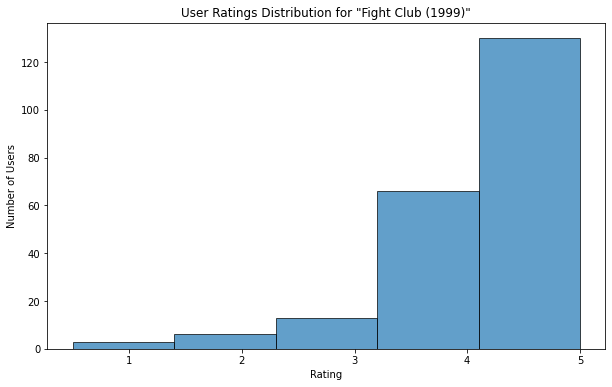

The distribution is left-skewed .


In [122]:
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
# Get the movieId for "Fight Club (1999)"
fight_club_movie_id = df_movies.loc[df_movies['title'] == 'Fight Club (1999)', 'movieId'].values[0]

# Filter ratings for the specified movieId
fight_club_ratings = df_ratings.loc[df_ratings['movieId'] == fight_club_movie_id, 'rating']

# Plot a histogram to visualize the data distribution
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings, bins=5, edgecolor='black', alpha=0.7)
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()

# Calculate skewness and kurtosis for analysis
skewness = skew(fight_club_ratings)
kurt = kurtosis(fight_club_ratings)

# Print the analysis result based on skewness and kurtosis
if -0.5 <= skewness <= 0.5 and -0.5 <= kurt <= 0.5:
    print("normal distribution")
elif skewness < -0.5:
    print("The distribution is left-skewed .")
elif skewness > 0.5:
    print("The distribution is right-skewed.")
else:
    print("The distribution is not easily categorized as normal, left-skewed, or right-skewed.")


# Mandatory Operations:

# 1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 

In [136]:
# Group by movieId and apply aggregation operations
movie_ratings_stats = ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()

# Rename the columns for clarity
movie_ratings_stats.columns = ['movieId', 'num_ratings', 'average_rating']

# Display the result
print(movie_ratings_stats.head())


   movieId  num_ratings  average_rating
0        1          215        3.920930
1        2          110        3.431818
2        3           52        3.259615
3        4            7        2.357143
4        5           49        3.071429


# 2.Apply inner join on dataframe created from movies.csv and the grouped df from step 1

In [140]:
# Perform an inner join on 'movieId'
merged_df = pd.merge(df_movies, movie_ratings_stats, on='movieId', how='inner')


merged_df.head()

,movieId,title,genres,num_ratings,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429


# 3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [142]:
# Assuming you have the merged_df DataFrame from the previous steps

# Filter movies with more than 50 user ratings
filtered_movies = merged_df[merged_df['num_ratings'] > 50]

# Display the resulting DataFrame
#print(filtered_movies.head())
filtered_movies.head()

,movieId,title,genres,num_ratings,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


# Which movie is the most popular based on  average user ratings?

In [144]:
# Find the movie with the highest average rating
most_popular_movie = filtered_movies.loc[filtered_movies['average_rating'].idxmax()]


print(f"The most popular movie based on average user ratings is:\n{most_popular_movie[['title', 'average_rating']]}")


The most popular movie based on average user ratings is:
title             Shawshank Redemption, The (1994)
average_rating                            4.429022
Name: 277, dtype: object


# Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [145]:
# Sort the DataFrame by 'num_ratings' in descending order
top_5_popular_movies = filtered_movies.sort_values(by='num_ratings', ascending=False).head(5)


print("Top 5 popular movies based on the number of user ratings:")
print(top_5_popular_movies[['title', 'num_ratings']])


Top 5 popular movies based on the number of user ratings:
                                 title  num_ratings
314                Forrest Gump (1994)          329
277   Shawshank Redemption, The (1994)          317
257                Pulp Fiction (1994)          307
510   Silence of the Lambs, The (1991)          279
1938                Matrix, The (1999)          278


# Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [146]:
# Filter Sci-Fi movies
scifi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]
# Sort Sci-Fi movies by 'num_ratings' in descending order
sorted_scifi_movies = scifi_movies.sort_values(by='num_ratings', ascending=False)
# Select the third row (index 2 since indexing starts from 0)
third_most_popular_scifi_movie = sorted_scifi_movies.iloc[2]
print(f"The third most popular Sci-Fi movie based on the number of user ratings is:\n{third_most_popular_scifi_movie[['title', 'num_ratings']]}")


The third most popular Sci-Fi movie based on the number of user ratings is:
title          Jurassic Park (1993)
num_ratings                     238
Name: 418, dtype: object


# web scraping

In [147]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }

    # Send a GET request to the IMDb URL with the specified headers
    response = requests.get(URL, headers=request_header)

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the IMDb rating using the appropriate HTML tag and attributes
    imdb_rating = soup.find('span', itemprop='ratingValue')

    # Return the IMDb rating or np.nan if not found
    return imdb_rating.text if imdb_rating else np.nan


In [149]:


ratings_data = pd.read_csv('ratings.csv')
links_data = pd.read_csv('links.csv')


ratings_count = ratings_data.groupby('movieId').size().reset_index(name='rating_count')


links_with_ratings = pd.merge(links_data, ratings_count, on='movieId', how='inner')

movies_subset_50 = links_with_ratings[links_with_ratings['rating_count'] > 50]


print(movies_subset_50.head())

   movieId  imdbId   tmdbId  rating_count
0        1  114709    862.0           215
1        2  113497   8844.0           110
2        3  113228  15602.0            52
5        6  113277    949.0           102
6        7  114319  11860.0            54


In [150]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class': 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan
scrapper(114709)

'8.3'

In [151]:
movies_subset_50['imdb_rating'] = movies_subset_50['imdbId'].apply(scrapper)

C:\Users\santhosh\AppData\Local\Temp\ipykernel_33408\497738162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_subset_50['imdb_rating'] = movies_subset_50['imdbId'].apply(scrapper)


In [153]:
movies_subset_50['imdb_rating']

0       8.3
1       7.1
2       6.6
5       8.3
6       6.3
       ... 
8287    8.2
8354    8.1
8358    8.7
8457    8.0
8673    8.0
Name: imdb_rating, Length: 436, dtype: object

In [154]:
movies_subset_50['imdb_rating'] = movies_subset_50['imdb_rating'].astype(float)

C:\Users\santhosh\AppData\Local\Temp\ipykernel_33408\993014958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_subset_50['imdb_rating'] = movies_subset_50['imdb_rating'].astype(float)


# Mention the movieId of the movie which has the highest IMDB rating

In [159]:
highest_rated_movie = movies_subset_50.loc[movies_subset_50['imdb_rating'].idxmax()]
print(highest_rated_movie['movieId'])

318.0


In [157]:
merge = pd.merge(movies_subset_50, df_movies, on='movieId', how='inner')

# Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating

In [160]:
sci_fi_movies = merge[merge['genres'].str.contains('Sci-Fi')]
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['imdb_rating'].idxmax()]
print(highest_rated_sci_fi_movie['movieId'])

79132
